1. Write your own original code that produces a dataset that conforms to the classic univariate regression model. Your data set should have 99 observations and a Normal error term. The slope of the coefficient on your regressor should be positive. Now include a single outlier, such that when you fit a regression to your 100 data points, the slope of your regression line is negative.  Your answer to this question should consist of:
    - Your original data-generating equation
    - Regression results for the original 99 (copy/paste the “summary” output)
    - Regression results with the outlier included (copy/paste “summary” output)
    - A properly-labeled data visualization that shows a single scatterplot, the regression line based on the original 99 points, and another differentiated regression line based on 100 points.
    - No more than 3 sentences that would serve as a caption for your figure if it were to be included in an econometrics textbook to illustrate the dangers of extrapolation.


Call:
lm(formula = y[-100] ~ x[-100])

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8988 -0.5718 -0.1101  0.5678  2.2892 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.03465    0.09774  -0.355 0.723702    
x[-100]      0.42479    0.10816   3.927 0.000161 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9646 on 97 degrees of freedom
Multiple R-squared:  0.1372,	Adjusted R-squared:  0.1283 
F-statistic: 15.42 on 1 and 97 DF,  p-value: 0.0001609



Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.0233  -0.6306   0.1935   0.9965   4.6926 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -0.2010     0.3176  -0.633   0.5282  
x            -0.5919     0.3351  -1.766   0.0804 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.139 on 98 degrees of freedom
Multiple R-squared:  0.03086,	Adjusted R-squared:  0.02097 
F-statistic:  3.12 on 1 and 98 DF,  p-value: 0.08043


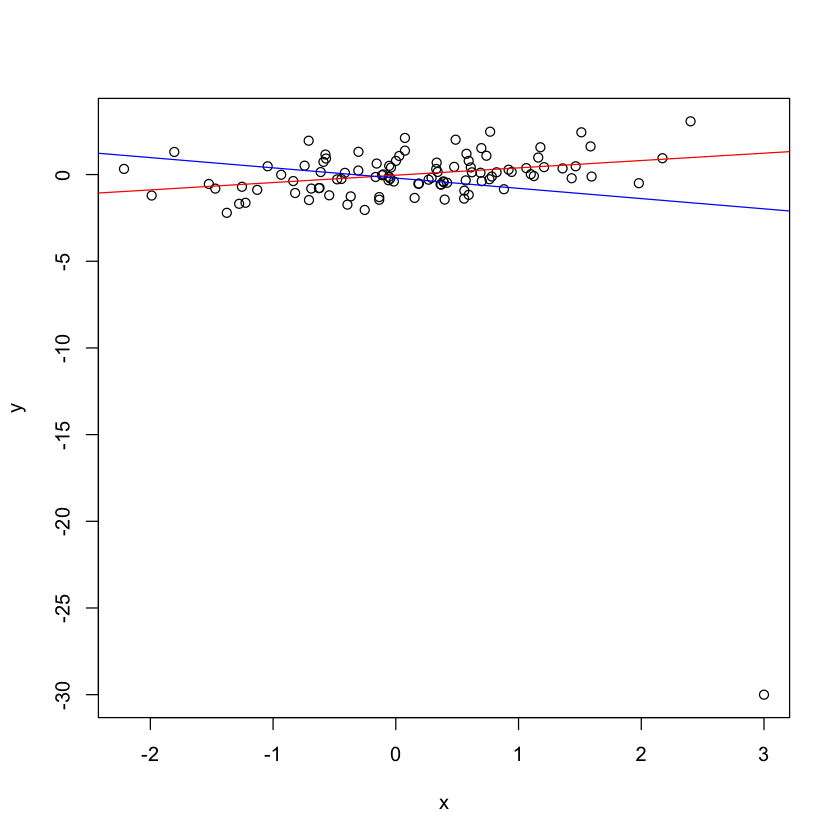

In [171]:
set.seed(1)
x = c(rnorm(n = 99, mean = 0, sd = 1), 3)
y = c(0.5*x[-100] + rnorm(n = 99, mean = 0, sd = 1), -30)
summary(lm(y[-100] ~ x[-100])); summary(lm(y ~ x))

plot(y ~ x)
abline(lm(y[-100] ~ x[-100]), col = "red"); abline(lm(y ~ x), col = "blue")

Fig 1. We see that when excluding the outlier in the bottom right, the regression line (in red) is slightly positive. The t-statistic of the regression corresponds with a p-value of 0.000161, which is highly significant, and so the model is quite certain of the accuracy of the slope of the regression line. When the outlier is included, the best fit line (in blue) is now negative. The model is additionally now unsure of the correct slope, with a t-statistic of -1.766 or a p-value of 0.0804, which is normally not considered significant.

NOTE: FOR THIS PROBLEM (AND THIS PROBLEM ONLY), USE ONLY THE CONTROL GROUP. DO NOT USE ANY UNITS FOR WHICH TREATMENT == 1.
Using the Lalonde data set and a linear model that predicts re78 as a linear additive function of age, educ, re74, re75, educ * re74, educ * re75, age * re74, age * re75, and re74 * re75, estimate:
- the 95% prediction interval for re78, for every unit, using simulation (i.e., 10000 simulated predictions for every row from 10000 sets of coefficients). You will need to incorporate simulated sigmas, and you should hold educ, re74, and re75 at their medians (hence only age will vary). 
- the 95% prediction interval for re78, for every unit, using simulation (i.e., 10000 simulated predictions for every row from 10000 sets of coefficients). You will need to incorporate simulated sigmas, and you should hold educ, re74, and re75 at their 90% quantiles (hence only age will vary).

Your answer to this question should consist of the following:
- A table with the relevant point estimates (e.g., the bounds of the prediction intervals of y for the different ages, and the medians of the other predictors)
- 2 figures showing the scatterplots (one for the analysis holding predictors at their medians, and other for the analysis holding predictors at their 90% quantiles). Each of these figures should show how the prediction intervals’ change over time. Be sure to label your scatterplot’s features (axis, title, etc.). E.g.: https://gist.github.com/diamonaj/75fef6eb48639c2c36f73c58d54bac2f


In [190]:
library(Matching)
library(arm)
data(lalonde)

set.seed(1)

sim_results = sim(lm(re78 ~ age, data = lalonde), n.sims = 10000)
mean(sim_results@coef[,1])
# sim_results@coef

first_set_of_simulated_ys_including_irreducible_error <- 
      sim_results@coef[1,1]*rep(1, length(lalonde$age)) + 
      sim_results@coef[1,2]*lalonde$age + 
      rnorm(length(lalonde$age), 0, sim_results@sigma[1])

quantile(first_set_of_simulated_ys_including_irreducible_error, c(0.025, 0.975))

[1] 3943.684

2.5%     97.5% 
-8267.927 17754.909

Obtain the nsw.dta dataset from http://users.nber.org/~rdehejia/data/nswdata2.html. Read the description of this data set provided on the page. If you proceed with this work in R (recommended) use the foreign library to open it (so you can use read.dta).

Specify a regression model in which the dependent variable is re78 and the sole predictor is treatment (and, an intercept should be included automatically, by default). Then, bootstrap the 95% confidence intervals for the value of the coefficient for treatment. Then, obtain the analytical confidence interval for the coefficient value using the standard error that pops out of a regression (or equivalently, in R, you can use the confint function). Compare the two confidence intervals--one obtained via simulation, the other via the formula.

NOTE: Make sure that you don’t use a ‘canned’ bootstrap function -- please code the bootstrap routine manually.

Your answer to this question should consist of the following:
- A table with the relevant results (bounds on the 2 confidence intervals).
- 1 histogram (properly labeled) showing your bootstrap-sample results. How you do this one is up to you.
- No more than 3 sentences summarizing the results and drawing any conclusions you find relevant and interesting.

,2.5%,97.5%
bootstrap,-75.40639,1889.614
analytical,-40.52635,1813.134


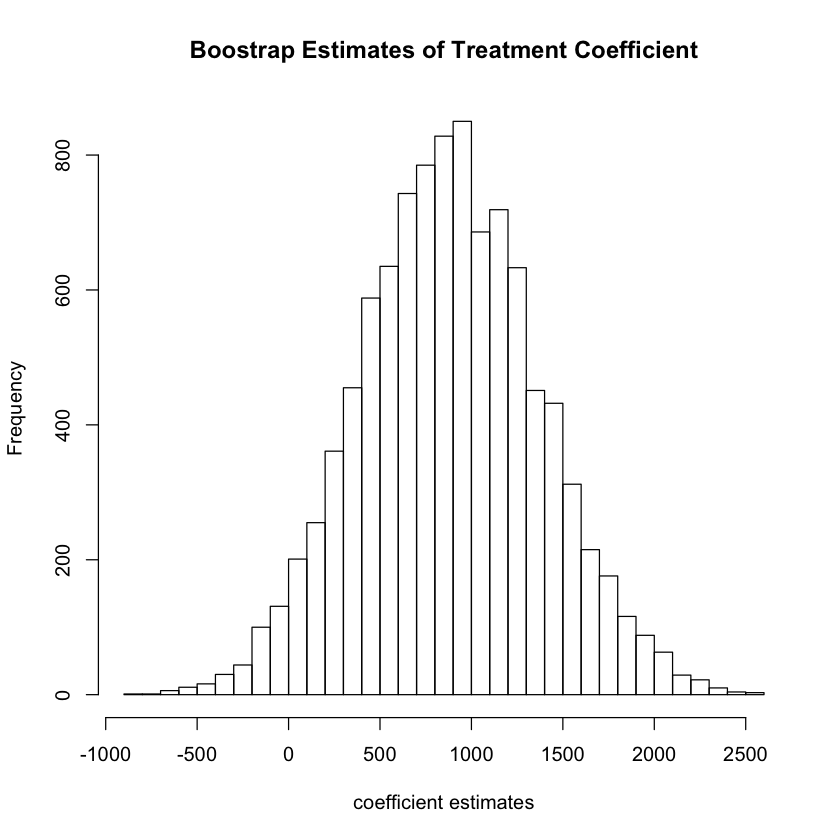

In [362]:
library(foreign); library(boot)
df = read.dta("http://www.nber.org/~rdehejia/data/nsw.dta")

boot.fn = function(data, index){coef(lm(re78 ~ treat, data = data, subset = index))}

bootstrap = quantile(boot(df, boot.fn, 10000)$t[,2], probs = c(0.025, 0.975))
analytical = confint(lm(formula =  re78 ~ treat, data = df))[2,]
rbind(bootstrap, analytical)

hist(boot(df, boot.fn, 10000)$t[,2], breaks = 30, main = "Boostrap Estimates of Treatment Coefficient", xlab = "coefficient estimates")

Clearly, the coefficient estimates are normally distributed.

Write a function (5 lines max) that takes Ys and predicted Ys as inputs, and outputs R2. Copy/paste an example using the nsw.dta data (from #3 above) that shows it working.

In [246]:
r2 = function(y, f){sum((f - mean(f))^2)/sum((y - mean(y))^2)}
r2(df$re78, lm(re78 ~ treat, data = lalonde)$fitted.values)

summary(lm(re78 ~ treat, data = lalonde))$r.squared

[1] 0.01234502

[1] 0.01782339

Use the nsw.dta dataset from question 3 above to estimate the probability of being assigned to the treatment group (vs. the control group) for every observation in the data set. Your logistic regression model should be a linear additive function of all predictors available to you -- no interaction terms needed. NOTE: re78 is not a predictor because it postdates the treatment. (In other words, it’s an outcome.)

Your answer to this question should consist of the following:
Two properly labeled histograms: one in red (showing the distribution of the treatment group’s estimated probabilities) and one in blue (showing the distribution of the control group’s estimated probabilities). Extra credit for a legend in the plot.
No more than 3 sentences summarizing the differences between the two distributions of estimated probabilities, and whether/not your results are surprising and/or intuitive.


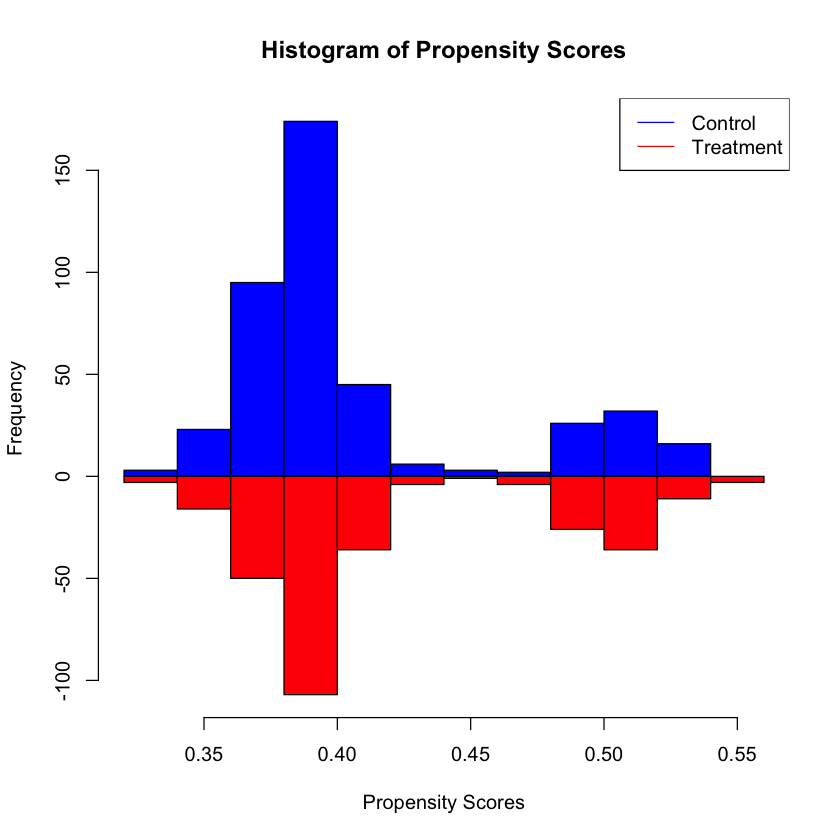

In [59]:
library("foreign")

df = read.dta("http://www.nber.org/~rdehejia/data/nsw.dta")
glm.fit = glm(treat ~ age + education + black + hispanic + married + nodegree + re75 , data = df, family=binomial)
h1 = hist(glm.fit$fitted.values[df$treat == 0], plot = FALSE)
h2 = hist(glm.fit$fitted.values[df$treat == 1], plot = FALSE)

h2$counts = -h2$counts
X = c(h1$breaks, h2$breaks)
plot(h1, ylim=c(min(h2$counts), max(h1$counts)), col="blue", xlim=c(min(X), max(X)), 
     main = "Histogram of Propensity Scores", xlab = "Propensity Scores")
lines(h2, col="red")
legend("topright", legend =c("Control", "Treatment"), col = c("blue", "red"), lty = c(1,1))

OPTIONAL, A BIT DIFFICULT, AND NOT NECESSARILY RECOMMENDED Extra Credit:
	Write code that repeatedly randomly selects predictors from the lalonde data set, runs a regression on those predictors (with “re78” as the dependent variable), and saves the treatment effect.  Produce a histogram showing the wide range of treatment effects that pop out. (This is much easier if you exclude interaction effects). Produce another histogram that shows the wide range of treatment effects that pop out that are also statistically significant.

In [393]:
## Naive Implementation using
x = 1:10
for (i in 1:length(x)){
    predictors = paste(sample(names(lalonde[,-c(9,12)]), sample(1:9, 1)), collapse = "+")
    lm.fit = eval(parse(text = qq("lm(re78 ~ @{predictors}, data = lalonde)")))
    print(summary(lm.fit))
}


Call:
lm(formula = re78 ~ married + age + re74 + hisp + u75 + black + 
    re75, data = lalonde)

Residuals:
   Min     1Q Median     3Q    Max 
 -8695  -4466  -1919   3027  54818 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.163e+03  1.643e+03   3.752 0.000199 ***
married      1.394e+02  8.872e+02   0.157 0.875220    
age          6.495e+01  4.563e+01   1.424 0.155269    
re74         6.800e-02  7.836e-02   0.868 0.385983    
hisp        -7.087e+02  1.542e+03  -0.460 0.646027    
u75         -8.278e+02  8.343e+02  -0.992 0.321624    
black       -2.493e+03  1.169e+03  -2.132 0.033528 *  
re75         1.285e-03  1.503e-01   0.009 0.993186    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6588 on 437 degrees of freedom
Multiple R-squared:  0.02856,	Adjusted R-squared:  0.013 
F-statistic: 1.835 on 7 and 437 DF,  p-value: 0.07885


Call:
lm(formula = re78 ~ hisp + nodegr + re75 + married, data = lalon

In [395]:
## Better Implementation using matching nearest neighbor matching. This takes about 1.5 - 15 mins.

library(GetoptLong); library(MatchIt); library(Zelig)

x = 1:1000; nearest = "nearest"; control = "control"; treat = "treat"; ls = "ls"

for (i in 1:length(x)){
    predictors = paste(sample(names(lalonde[,-c(9,12)]), sample(1:9, 1)), collapse = "+")
    
    m.out = eval(parse(text = qq("matchit(treat ~ @{predictors}, method = @{nearest}, data = lalonde)")))
    z.out = eval(parse(text = qq("zelig(re78 ~ @{predictors}, data = match.data(m.out, @{control}), cite = FALSE, model = @{ls})")))
    x.out = setx(z.out, data = match.data(m.out1, "treat"), cond = TRUE)
    s.out = sim(z.out, x = x.out)
    
    x[i] = mean(unlist(s.out[["sim.out"]][["x"]][["ev"]]))
}
hist(x)

Preprocessing data ...
Performing convex hull test ...
Calculating distances ....
Calculating the geometric variance...
Calculating cumulative frequencies ...
Finishing up ...
Preprocessing data ...
Performing convex hull test ...
Calculating distances ....
Calculating the geometric variance...
Calculating cumulative frequencies ...
Finishing up ...
Preprocessing data ...
Performing convex hull test ...
Calculating distances ....
Calculating the geometric variance...
Calculating cumulative frequencies ...
Finishing up ...
Preprocessing data ...
Performing convex hull test ...
Calculating distances ....
Calculating the geometric variance...
Calculating cumulative frequencies ...
Finishing up ...
Preprocessing data ...
Performing convex hull test ...
Calculating distances ....
Calculating the geometric variance...
Calculating cumulative frequencies ...
Finishing up ...
Preprocessing data ...
Performing convex hull test ...
Calculating distances ....
Calculating the geometric variance...


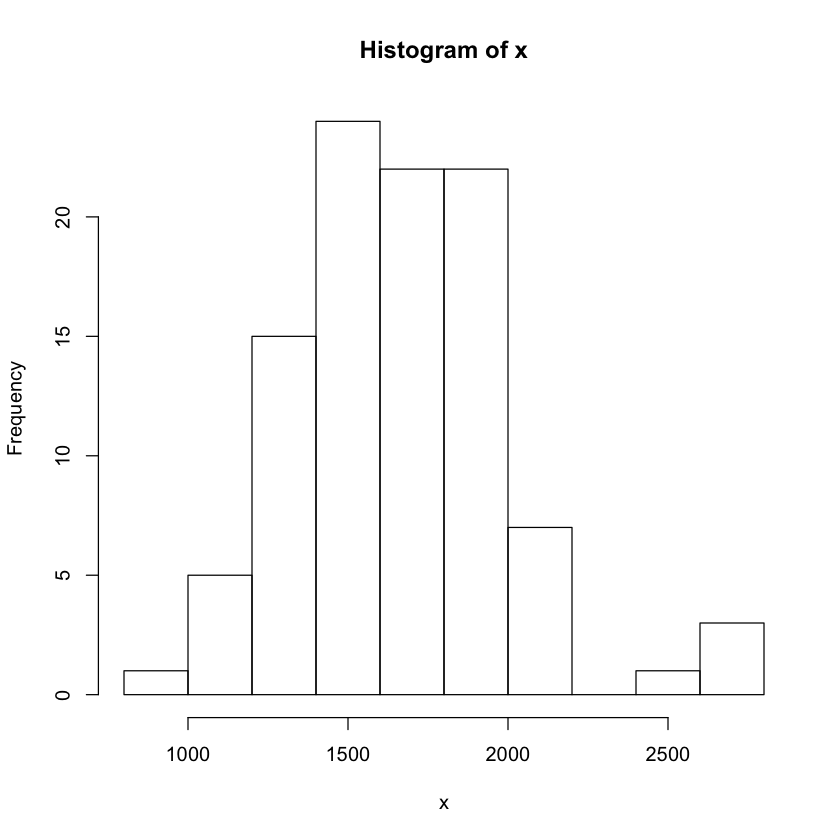

In [394]:
library(GetoptLong); library(MatchIt); library(Zelig)

x = 1:100; nearest = "nearest"; control = "control"; treat = "treat"; ls = "ls"; hull.control = "hull.control"

for (i in 1:length(x)){
    predictors = paste(sample(names(lalonde[,-c(9,12)]), sample(2:9, 1)), collapse = "+")
    m.out = eval(parse(text = qq("matchit(treat ~ @{predictors}, method = @{nearest}, discard = @{hull.control}, data = lalonde)")))
    z.out = eval(parse(text = qq("zelig(re78 ~ treat + @{predictors}, data = match.data(m.out), cite = FALSE, model = @{ls})")))
    x.out = setx(z.out, treat = 0); x.out1 = setx(z.out, treat = 1)
    s.out = sim(z.out, x = x.out, x1 = x.out1)
    x[i] = mean(unlist(s.out[["sim.out"]][["x1"]][["fd"]]))
}

hist(x)